In [41]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR



In [21]:
# Load the dataset
data = pd.read_csv('Placement_Data_Full_Class.csv')

In [22]:
X = data.iloc[:,[2,4,7,10,12,14]].values
Y = data.iloc[:,13].values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:,[5]])
X[:,[5]] = imputer.transform(X[:,[5]])
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split( X, Y , test_size=0.3 , random_state=10)

In [25]:
#THREE models are build below -KNN.DECISION TREE, RANDOM FOREST
#Model is fitted using decision tree classifier
# Because it can capture the non-linearity in the data 

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold,cross_val_score
dt=DecisionTreeClassifier(criterion='entropy')

dt.fit(xtrain,ytrain)
#Getting all the categorical columns except the target
categorical_columns = data.select_dtypes(exclude = 'number').drop('status', axis = 1).columns

print(categorical_columns)
ypred=dt.predict(xtest)
ypredt=dt.predict(xtrain)
ypred_prob=dt.predict_proba(xtest)[:,1]

score=cross_val_score(dt, xtrain,ytrain,scoring='accuracy', cv=5)

bias_error=np.mean(1-score)
var_error=np.std(score)
print('Bias_error',bias_error)
print('Variance_error:',var_error)

Index(['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex',
       'specialisation'],
      dtype='object')
Bias_error 0.01333333333333333
Variance_error: 0.01632993161855452


In [26]:
from scipy.stats import chi2_contingency
chi2_check = []
for i in categorical_columns:
    if chi2_contingency(pd.crosstab(data['status'], data[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(data = [categorical_columns, chi2_check] 
             ).T 
res.columns = ['Column', 'Hypothesis']
print(res)

           Column                      Hypothesis
0          gender  Fail to Reject Null Hypothesis
1           ssc_b  Fail to Reject Null Hypothesis
2           hsc_b  Fail to Reject Null Hypothesis
3           hsc_s  Fail to Reject Null Hypothesis
4        degree_t  Fail to Reject Null Hypothesis
5          workex          Reject Null Hypothesis
6  specialisation          Reject Null Hypothesis


In [27]:
# So after feature selection of categorical and numerical features, X comes as,
X = data.iloc[:,[2,9,11,14]].values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:,[3]])
X[:,[3]] = imputer.transform(X[:,[3]])

In [29]:
print(data['workex'].unique())
print(data['specialisation'].unique())
print(data['status'].unique())

['No' 'Yes']
['Mkt&HR' 'Mkt&Fin']
['Placed' 'Not Placed']


In [28]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
X[:,1] = le1.fit_transform(X[:, 1])
le2 = LabelEncoder()
X[:,2] = le2.fit_transform(X[:, 2])
le3 = LabelEncoder()
Y = le3.fit_transform(Y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,[0,3]] = sc.fit_transform(X_train[:,[0,3]])
X_test[:,[0,3]] = sc.transform(X_test[:,[0,3]])



In [39]:
pip install lightgbm

     ---------------------------------------- 1.3/1.3 MB 385.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Confusion matrix of  Logistic Regression
[[ 7  8]
 [ 3 25]]
Accuracy score is  0.7441860465116279
Confusion matrix of  Support Vector Machine
[[ 9  6]
 [ 3 25]]
Accuracy score is  0.7906976744186046
Confusion matrix of  Decision Tree
[[15  0]
 [ 0 28]]
Accuracy score is  1.0


C:\Users\kukku\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Confusion matrix of  Neural Network
[[ 9  6]
 [ 4 24]]
Accuracy score is  0.7674418604651163
Confusion matrix of  Random Forest
[[15  0]
 [ 0 28]]
Accuracy score is  1.0
Confusion matrix of  XGBoost
[[15  0]
 [ 0 28]]
Accuracy score is  1.0
[LightGBM] [Info] Number of positive: 120, number of negative: 52
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.069487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 68
[LightGBM] [Info] Number of data points in the train set: 172, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.697674 -> initscore=0.836248
[LightGBM] [Info] Start training from score 0.836248
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

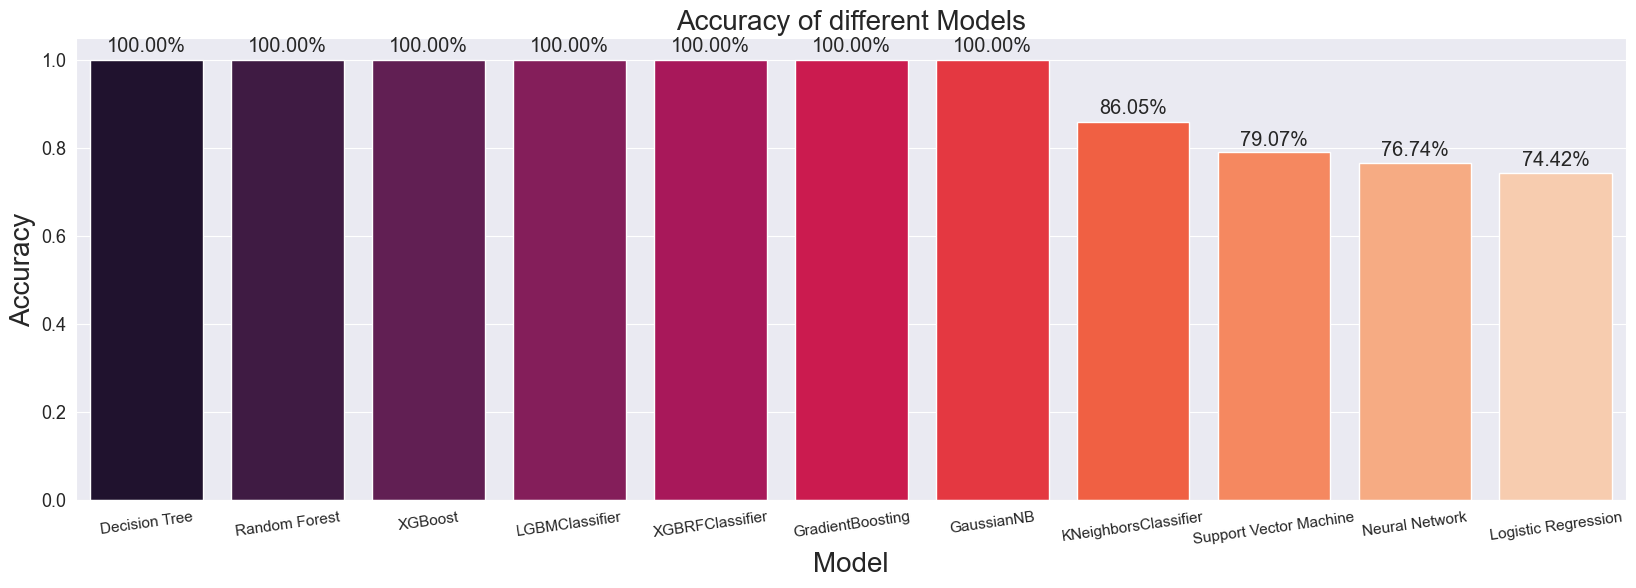

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix


import lightgbm
import xgboost
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

names = [
  
    "Logistic Regression",
    "Support Vector Machine",
    "Decision Tree",
    "Neural Network",
    "Random Forest",
    "XGBoost",
    "LGBMClassifier",
    "XGBRFClassifier",
    "GradientBoosting",
    "GaussianNB",
    "KNeighborsClassifier"
]
models = [
    
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    MLPClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    lightgbm.LGBMClassifier(max_depth=2, random_state=4),
    xgboost.XGBRFClassifier(max_depth=3, random_state=1),
    GradientBoostingClassifier(max_depth=2, random_state=1),
    GaussianNB(),
    KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
] 

accuracy=[]
for model, name in zip(models,names):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print('Confusion matrix of ',name)
    print(confusion_matrix(y_test, y_pred))
    ac = accuracy_score(y_test, y_pred)
    print('Accuracy score is ',ac)
    accuracy.append(ac)
    print('='*50)

Accuracy_list = pd.DataFrame(list(zip(names, accuracy)),columns =['Model', 'Accuracy'])
Accuracy_list= Accuracy_list.sort_values('Accuracy', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=True, key=None)

plt.rcParams['figure.figsize']=20,6 
sns.set_style("darkgrid")
ax = sns.barplot(x = 'Model',y = 'Accuracy',data = Accuracy_list , palette = "rocket", saturation =1.5)
plt.xlabel("Model", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

In [ ]:


# Data Preprocessing
# Handle missing values in 'salary' column (if necessary)
data['salary'].fillna(0, inplace=True)

# Encode categorical variables
categorical_cols = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Split the data into features and target(s)
X = data_encoded.drop(['sl_no', 'salary'], axis=1)  # Features
y_status = data_encoded['status_Placed']  # Placement status (classification target)
y_salary = data_encoded['salary']  # Salary (regression target)

# Split the data into training, validation, and test sets
X_train, X_temp, y_status_train, y_status_temp = train_test_split(X, y_status, test_size=0.3, random_state=42)
X_val, X_test, y_status_val, y_status_test = train_test_split(X_temp, y_status_temp, test_size=0.5, random_state=42)
y_salary_train = y_salary.loc[y_status_train.index]
y_salary_val = y_salary.loc[y_status_val.index]
y_salary_test = y_salary.loc[y_status_test.index]

# Feature Scaling (if necessary)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Model Selection and Training for Placement Status
# Choose a classification model (e.g., Random Forest, Logistic Regression, Decision Tree, SVM)
clf = RandomForestClassifier()
clf.fit(X_train_scaled, y_status_train)

# Make predictions on the validation set
y_status_pred = clf.predict(X_val_scaled)

# Evaluate the classification model
accuracy = accuracy_score(y_status_val, y_status_pred)
classification_rep = classification_report(y_status_val, y_status_pred)
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")

# Model Selection and Training for Salary Prediction (Regression)
# Choose a regression model (e.g., Random Forest, Linear Regression, Decision Tree, SVR)


In [2]:
# Model Selection and Training for Salary Prediction (Regression)
# Choose a regression model (e.g., Random Forest, Linear Regression, Decision Tree, SVR)
reg = RandomForestRegressor()
reg.fit(X_train_scaled, y_salary_train)

# Make predictions on the validation set
y_salary_pred = reg.predict(X_val_scaled)

# Evaluate the regression model
mse = mean_squared_error(y_salary_val, y_salary_pred)
r2 = r2_score(y_salary_val, y_salary_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Feature Importance Analysis
feature_importances = reg.feature_importances_
# You can print or visualize the feature importances to understand which features are important for salary prediction.


Mean Squared Error: 8271691368.75
R-squared: 0.6516650769256014


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Load the dataset
data = pd.read_csv('Placement_Data_Full_Class.csv')

# Data Preprocessing
# Handle missing values in 'salary' column (if necessary)
data['salary'].fillna(0, inplace=True)

# Encode categorical variables
categorical_cols = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Split the data into features and target(s)
X = data_encoded.drop(['sl_no', 'salary'], axis=1)  # Features
y_salary = data_encoded['salary']  # Salary (regression target)

# Split the data into training and test sets
X_train, X_test, y_salary_train, y_salary_test = train_test_split(X, y_salary, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Selection and Training for Salary Prediction (Regression)
reg = RandomForestRegressor(random_state=42)

# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_salary_train)

best_reg = grid_search.best_estimator_

# Make predictions on the test set
y_salary_pred = best_reg.predict(X_test_scaled)

# Evaluate the regression model
mse = mean_squared_error(y_salary_test, y_salary_pred)
r2 = r2_score(y_salary_test, y_salary_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Feature Importance Analysis
feature_importances = best_reg.feature_importances_
# You can print or visualize the feature importances to understand which features are important for salary prediction.


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mean Squared Error: 5986392636.486164
R-squared: 0.728554489584255


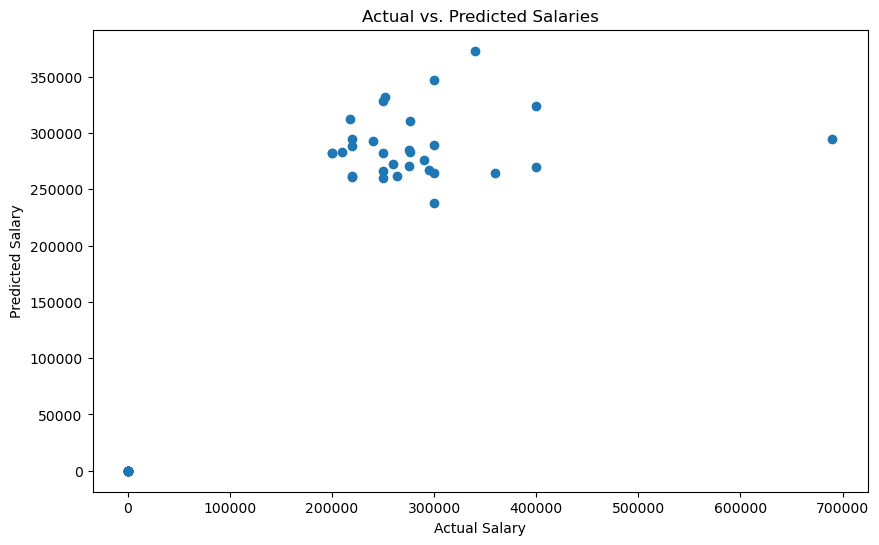

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(y_salary_test, y_salary_pred)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs. Predicted Salaries')
plt.show()


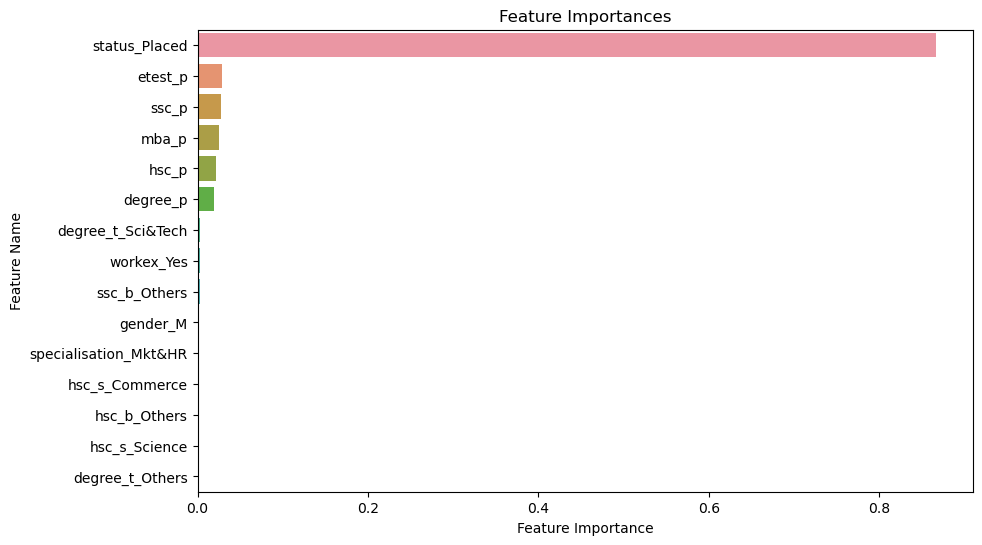

In [5]:
# Plot feature importances
plt.figure(figsize=(10, 6))
feature_names = X.columns
sorted_idx = np.argsort(feature_importances)[::-1]
sns.barplot(x=feature_importances[sorted_idx], y=feature_names[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importances')
plt.show()


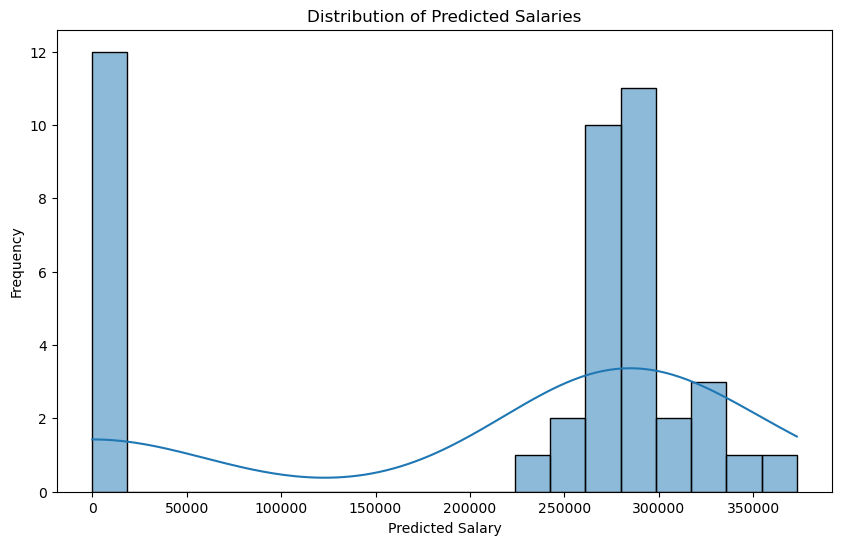

In [6]:
# Create a histogram of predicted salaries
plt.figure(figsize=(10, 6))
sns.histplot(y_salary_pred, bins=20, kde=True)
plt.xlabel('Predicted Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Salaries')
plt.show()


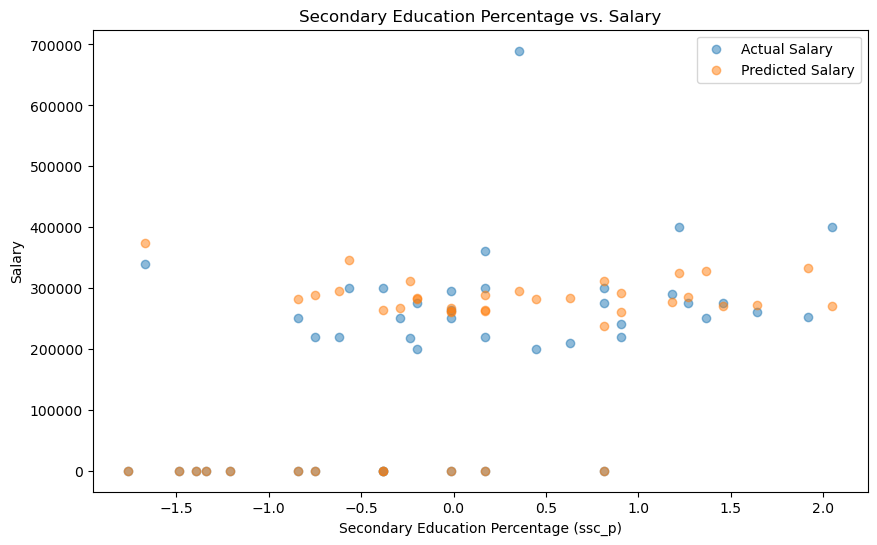

In [7]:
# Example for visualizing 'ssc_p' (Secondary Education percentage) vs. salary
plt.figure(figsize=(10, 6))
plt.scatter(X_test_scaled[:, 0], y_salary_test, label='Actual Salary', alpha=0.5)
plt.scatter(X_test_scaled[:, 0], y_salary_pred, label='Predicted Salary', alpha=0.5)
plt.xlabel('Secondary Education Percentage (ssc_p)')
plt.ylabel('Salary')
plt.title('Secondary Education Percentage vs. Salary')
plt.legend()
plt.show()


# fitting placed

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('Placement_Data_Full_Class.csv')

# Data Preprocessing
# Handle missing values in 'salary' column (if necessary)
data['salary'].fillna(0, inplace=True)

# Encode categorical variables
categorical_cols = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Split the data into features and target (placement status)
X = data_encoded.drop(['sl_no', 'status'], axis=1)  # Features
y_status = data_encoded['status']  # Placement status (classification target)

# Split the data into training and test sets
X_train, X_test, y_status_train, y_status_test = train_test_split(X, y_status, test_size=0.2, random_state=42)

# Feature Scaling (if necessary)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_status_train)

# Make predictions on the test set
y_status_pred = clf.predict(X_test_scaled)

# Evaluate the classifier
accuracy = accuracy_score(y_status_test, y_status_pred)
classification_rep = classification_report(y_status_test, y_status_pred)

# Print the accuracy and classification report
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

  Not Placed       1.00      1.00      1.00        12
      Placed       1.00      1.00      1.00        31

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('Placement_Data_Full_Class.csv')

# Data Preprocessing
# Handle missing values in 'salary' column (if necessary)
data['salary'].fillna(0, inplace=True)

# Encode categorical variables
categorical_cols = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Split the data into features and target (placement status)
X = data_encoded.drop(['sl_no', 'status'], axis=1)  # Features
y_status = data_encoded['status']  # Placement status (classification target)

# Split the data into training and test sets
X_train, X_test, y_status_train, y_status_test = train_test_split(X, y_status, test_size=0.2, random_state=42)

# Feature Scaling (if necessary)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_status_train)

# Get the best classifier
best_clf = grid_search.best_estimator_

# Make predictions on the test set
y_status_pred = best_clf.predict(X_test_scaled)

# Evaluate the classifier
accuracy = accuracy_score(y_status_test, y_status_pred)
classification_rep = classification_report(y_status_test, y_status_pred)

# Print the accuracy and classification report
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

# Print the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

  Not Placed       1.00      1.00      1.00        12
      Placed       1.00      1.00      1.00        31

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43

Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


## cross vlaidation m

In [10]:
from sklearn.model_selection import cross_val_score

# Assuming you have already defined 'best_clf' as your Random Forest Classifier with tuned hyperparameters

# Perform 5-fold cross-validation
scores = cross_val_score(best_clf, X_train_scaled, y_status_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0


In [11]:
# Assuming you have already fitted the 'best_clf' model on your data

# Get feature importances
feature_importances = best_clf.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print("Feature Importance Analysis:")
print(feature_importance_df)


Feature Importance Analysis:
                  Feature  Importance
5                  salary    0.471349
0                   ssc_p    0.166018
2                degree_p    0.117319
1                   hsc_p    0.082970
4                   mba_p    0.047660
3                 etest_p    0.035465
13             workex_Yes    0.024912
14  specialisation_Mkt&HR    0.021046
6                gender_M    0.008917
7            ssc_b_Others    0.007501
11        degree_t_Others    0.006487
9          hsc_s_Commerce    0.003320
10          hsc_s_Science    0.002764
12      degree_t_Sci&Tech    0.002427
8            hsc_b_Others    0.001845


## clusterign

In [43]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


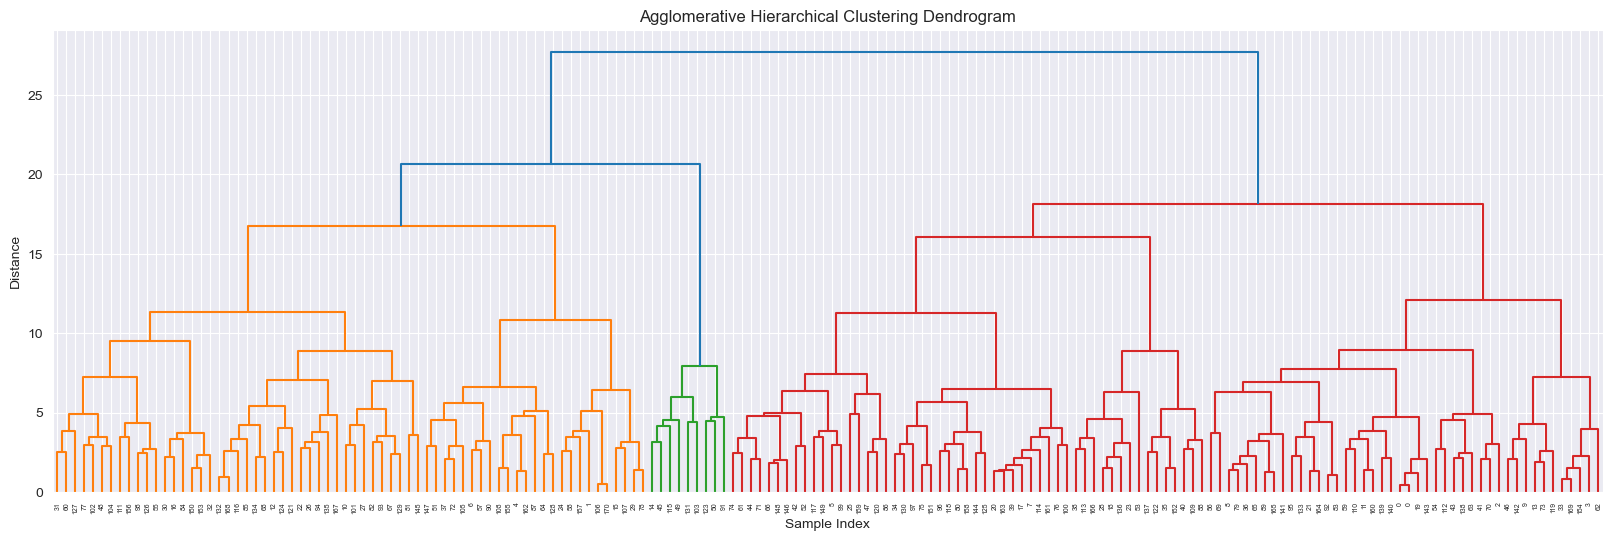

Cluster Counts:
0      2
154    1
34     1
49     1
41     1
      ..
53     1
94     1
76     1
158    1
2      1
Length: 171, dtype: int64


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Load and preprocess your dataset as you did before

# Assuming your preprocessed data is in X_train_scaled (feature-scaled data)

# Perform Agglomerative Hierarchical Clustering
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0.5)  # Adjust distance_threshold as needed
cluster_labels = clustering.fit_predict(X_train_scaled)

# Calculate linkage matrix for dendrogram
linkage_matrix = linkage(X_train_scaled, method='ward')  # Adjust method as needed

# Visualize the dendrogram (optional)
dendrogram(
    linkage_matrix,
    orientation="top",
    labels=cluster_labels,
    distance_sort="descending",
    show_leaf_counts=True,
)
plt.title("Agglomerative Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# You can explore the cluster assignments and analyze them further
# For example, you can check the distribution of samples in each cluster
cluster_counts = pd.Series(cluster_labels).value_counts()
print("Cluster Counts:")
print(cluster_counts)



In [14]:
# ... (previous code)

# Fit the model to your feature-scaled data
kmeans.fit(X_train_scaled)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Ensure that the 'data' DataFrame and 'cluster_labels' have the same number of rows
# If 'data' has more rows, you can truncate it to match the length of 'cluster_labels'
data = data.iloc[:len(cluster_labels)]

# Add the cluster labels to your original dataset
data['cluster'] = cluster_labels

# ... (rest of the code)

C:\Users\kukku\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kukku\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kukku\AppData\Local\Temp\ipykernel_16568\4160335577.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = cluster_labels


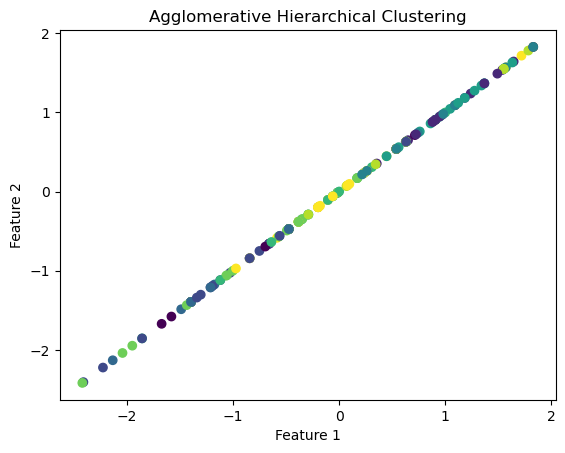

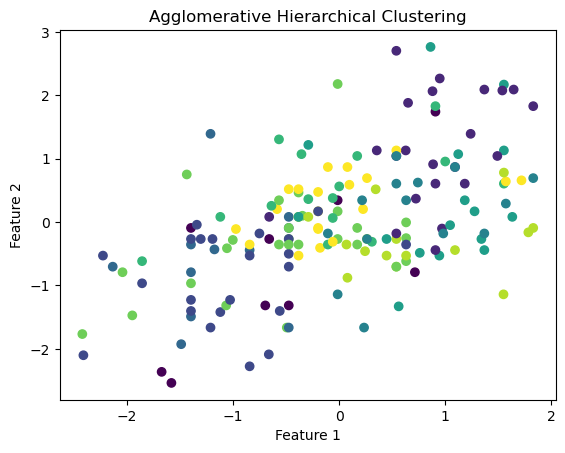

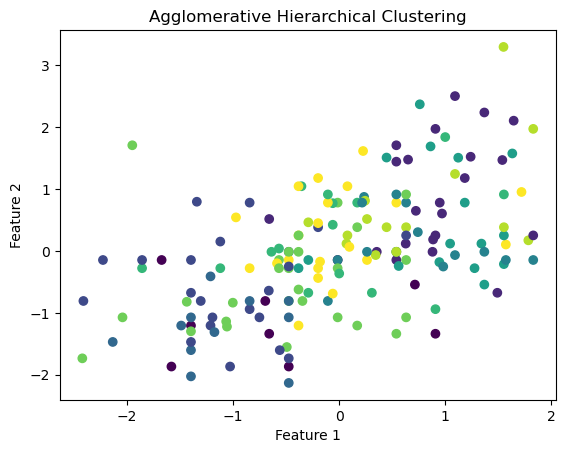

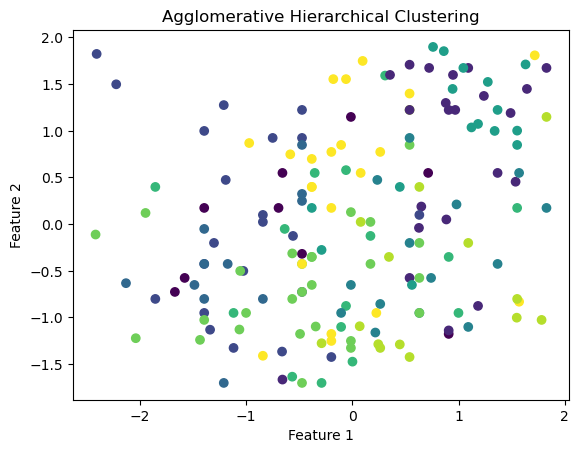

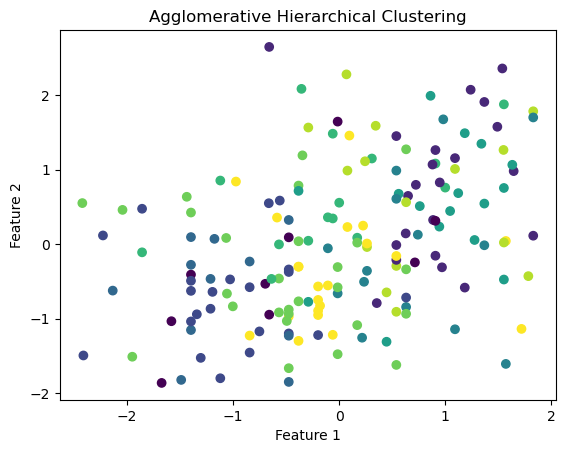

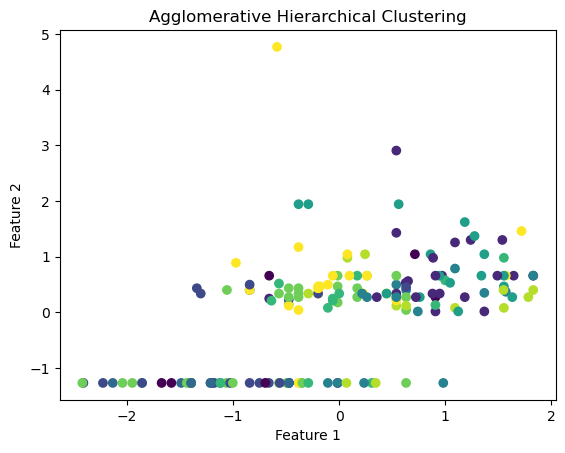

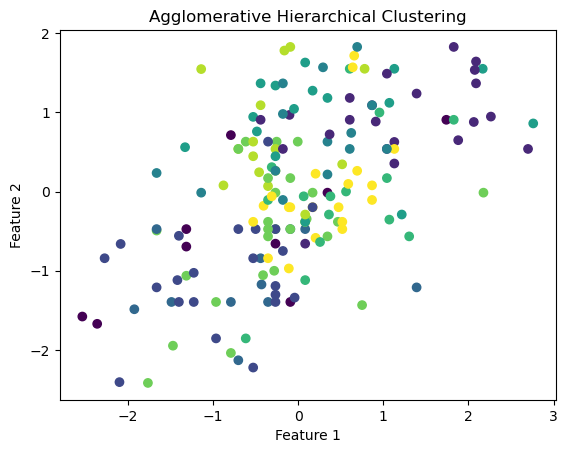

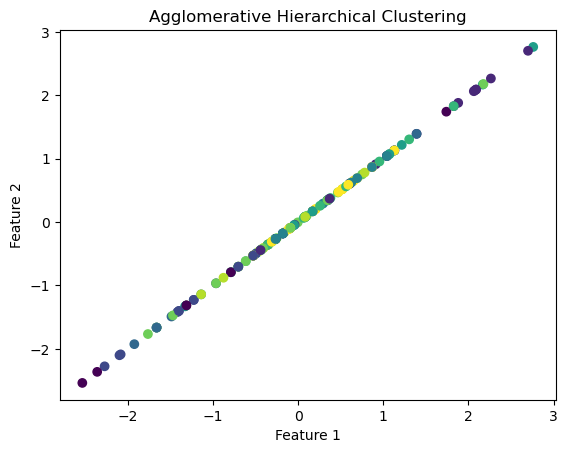

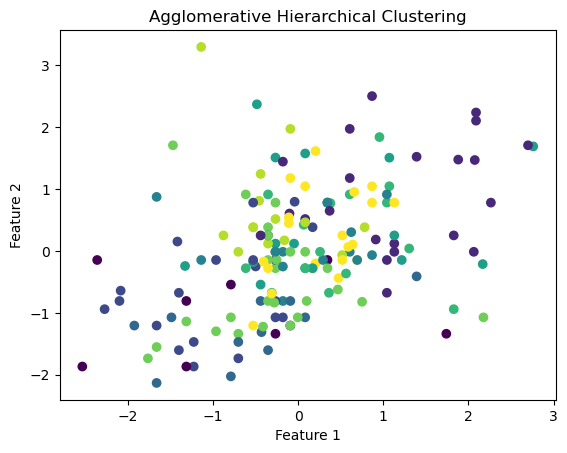

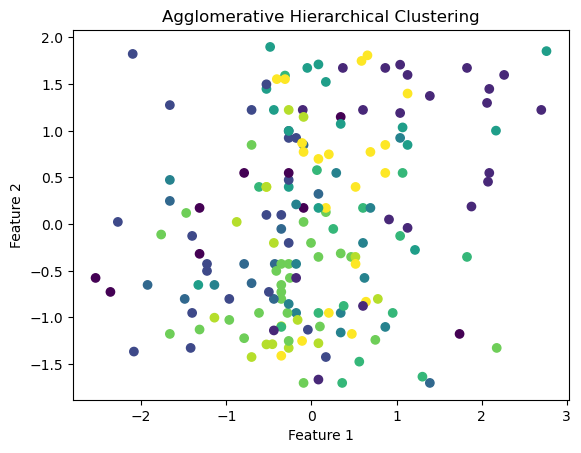

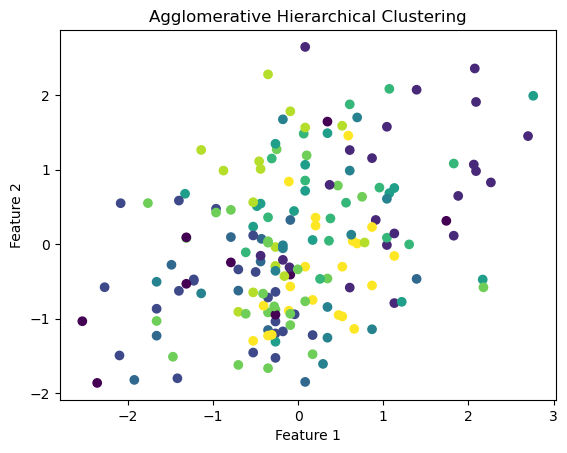

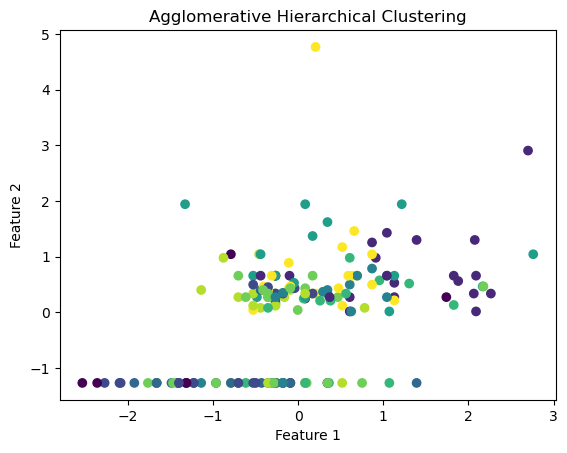

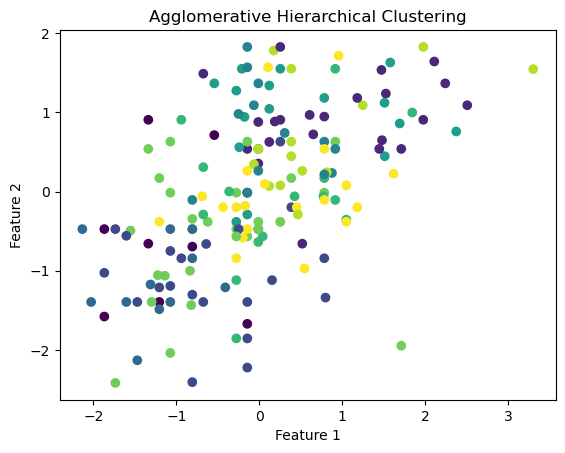

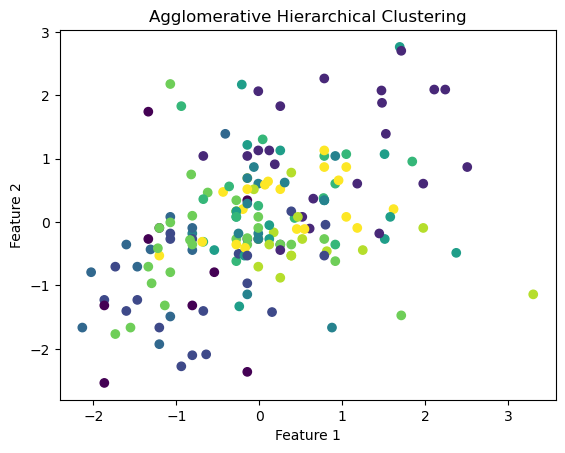

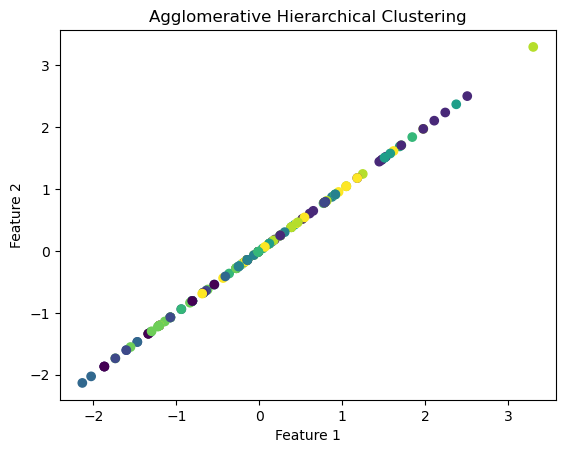

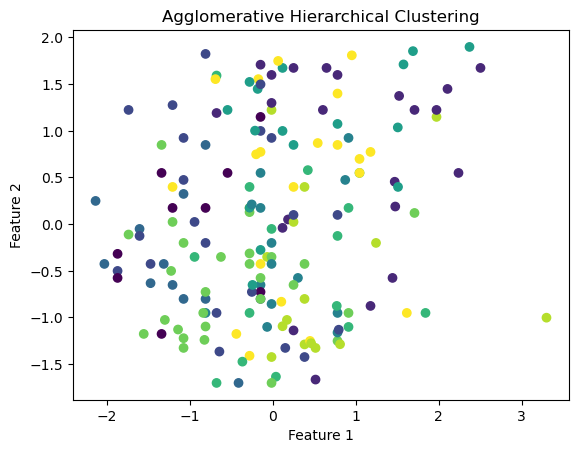

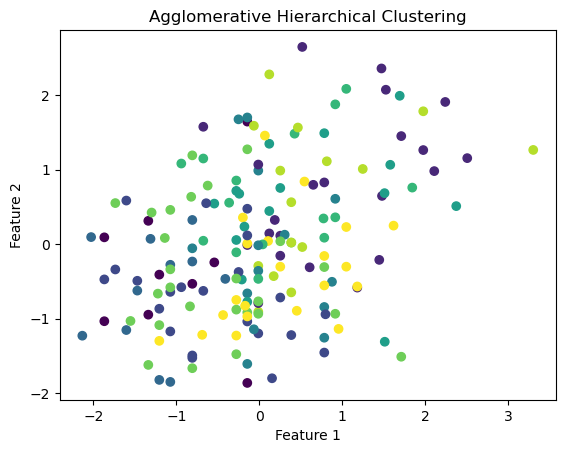

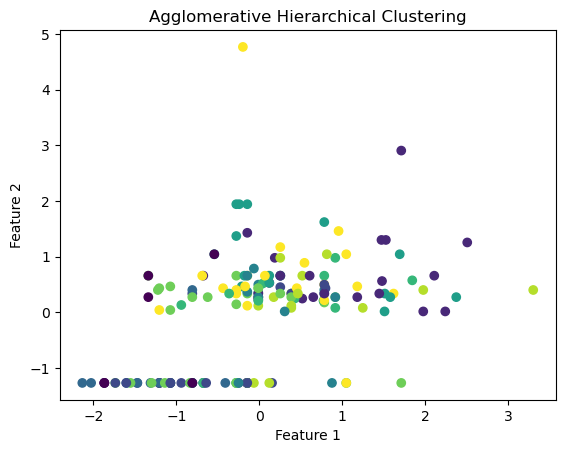

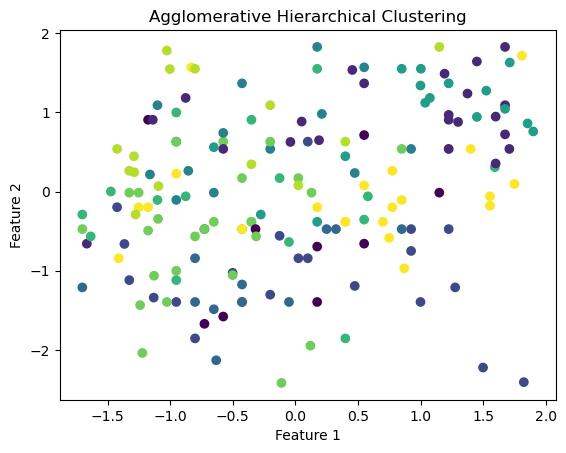

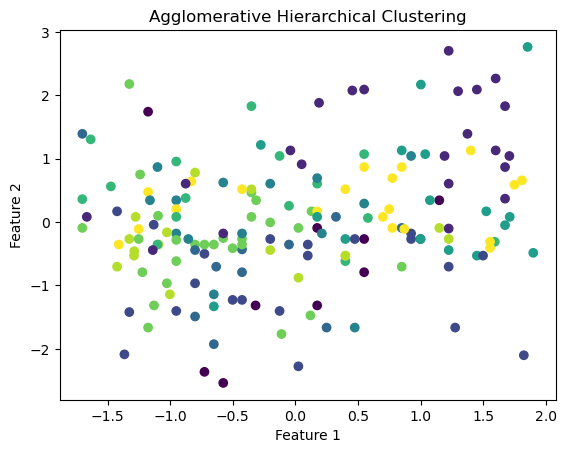

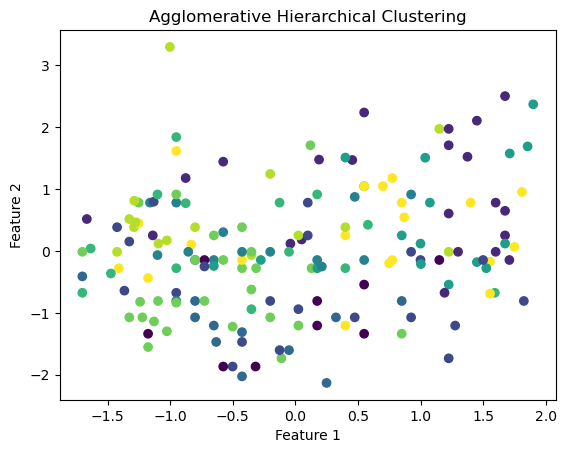

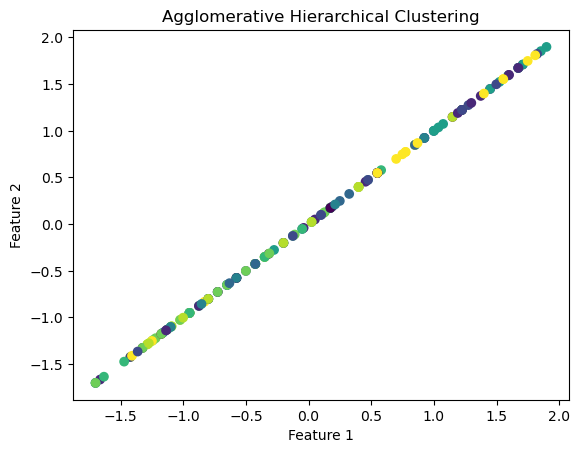

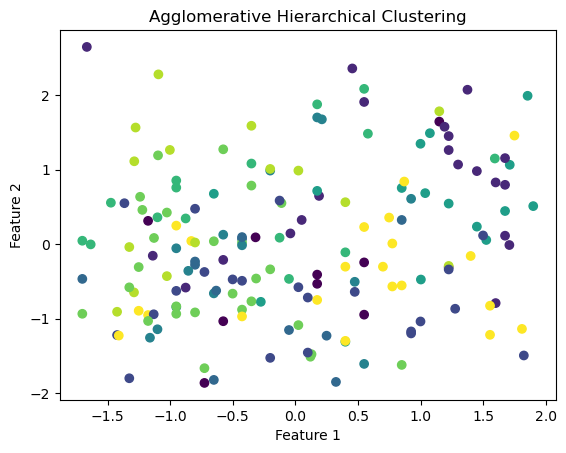

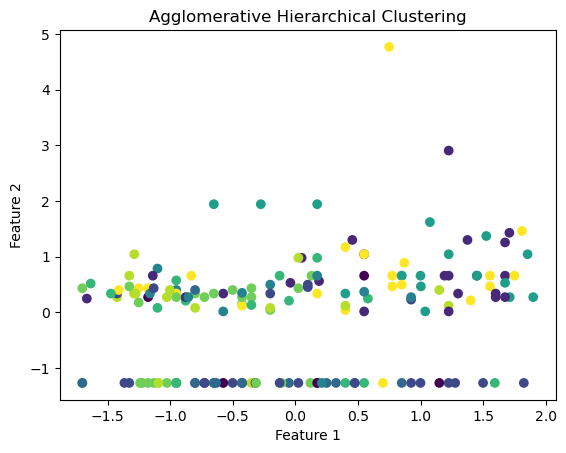

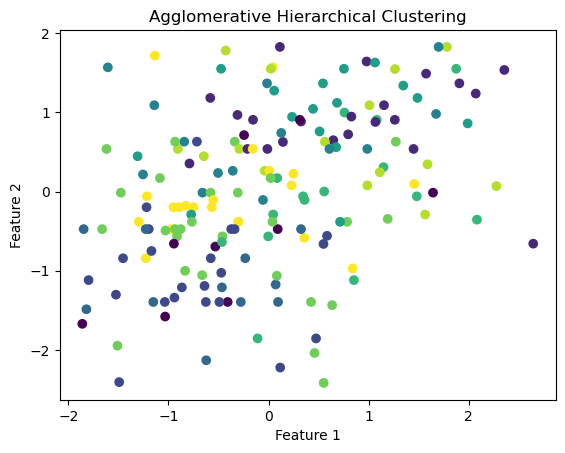

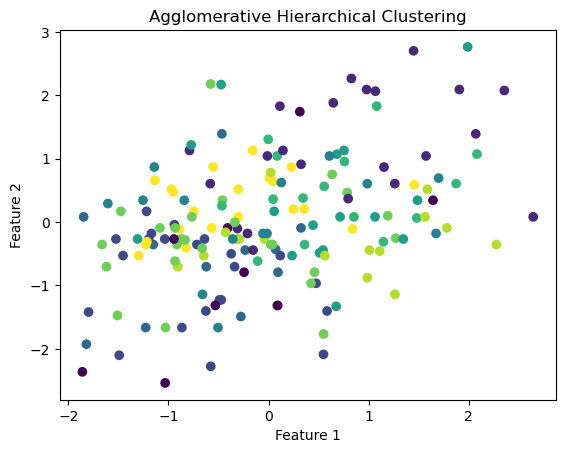

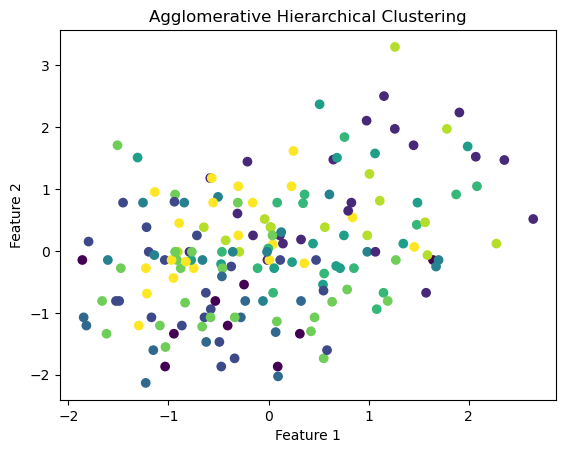

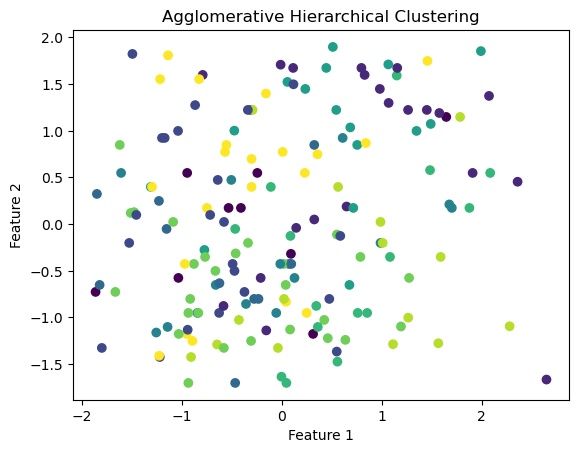

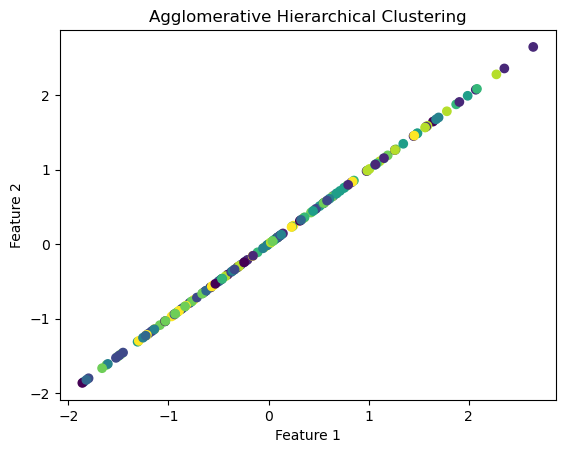

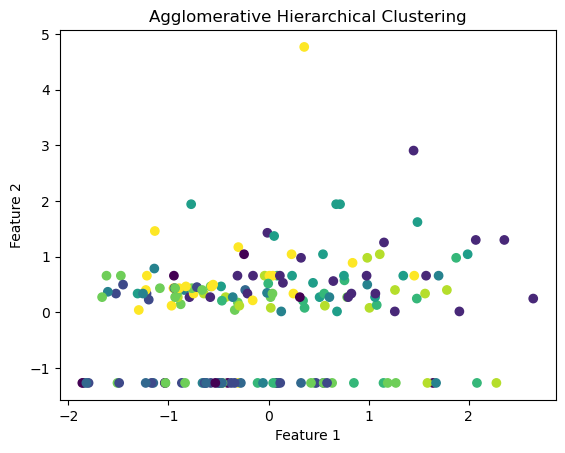

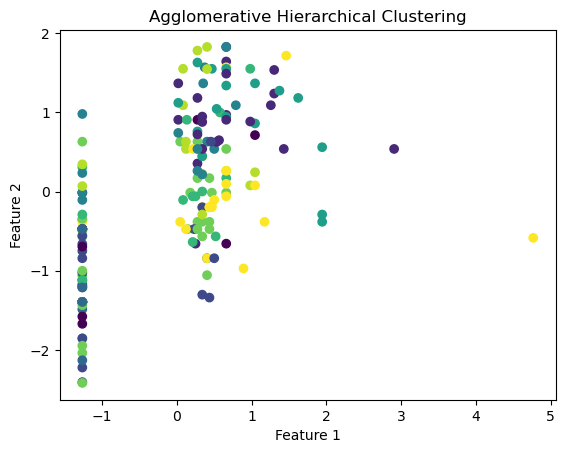

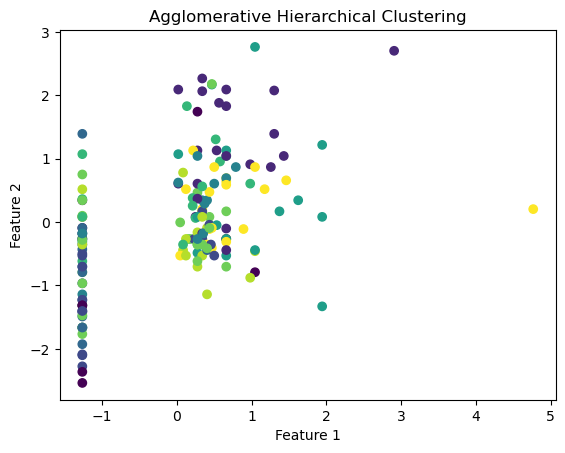

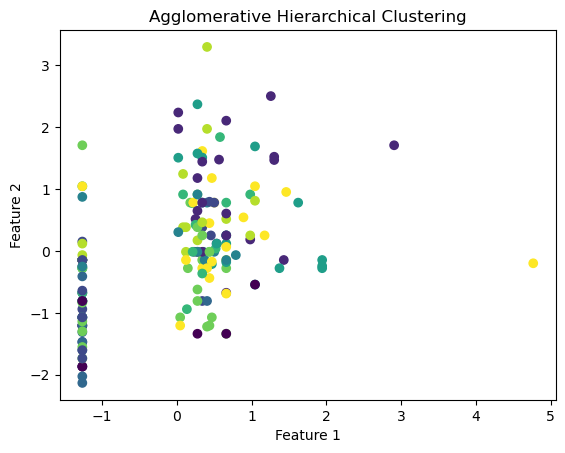

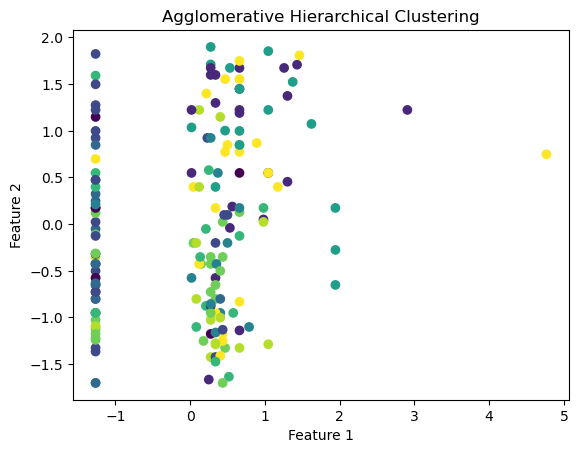

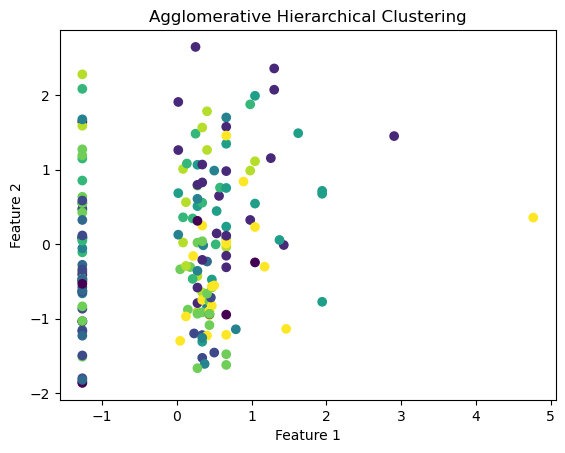

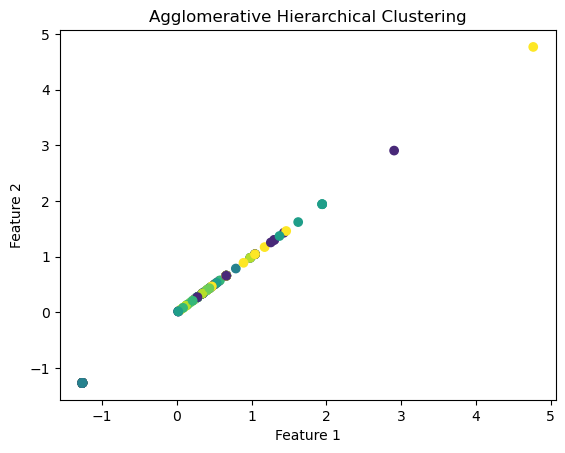

In [15]:
# Alternatively, you can plot a scatter plot for visualization
for i in range(6):
    for j in range(6):
        plt.scatter(X_train_scaled[:, i], X_train_scaled[:, j], c=cluster_labels, cmap='viridis')
        plt.title("Agglomerative Hierarchical Clustering")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.show()


In [16]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score for your clustering results
silhouette_avg = silhouette_score(X_train_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.14692469211112305


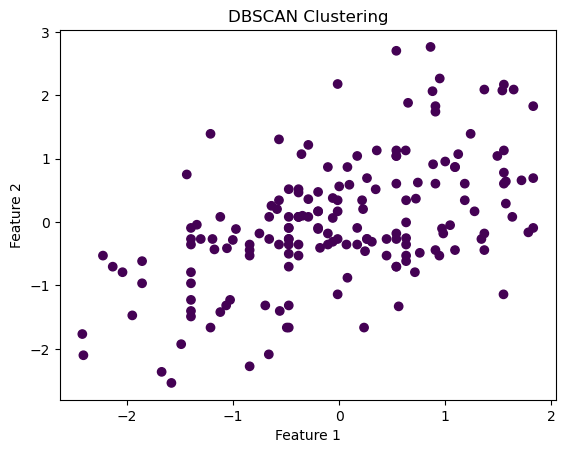

In [17]:
from sklearn.cluster import DBSCAN

# Initialize the DBSCAN clustering model
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed

# Fit the model to your feature-scaled data
dbscan_labels = dbscan.fit_predict(X_train_scaled)

# Visualize the clusters (assuming 2D data)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=dbscan_labels, cmap='viridis')
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


Gender and Placement Analysis

The  initial challenge revolves around understanding the performance of different genders within the program. The table below illustrates the placement status of male (M) and female (F) students, shedding light on the gender-based disparities in the scheme:

```
status      Not Placed   Placed   Total   Placement Rate (%)
Gender
F              21            29         50            58.000000
M             28            72        100           72.000000
```

Notably, a gender imbalance is evident, with a significantly higher number of male students in the program compared to their female counterparts. Moreover, the success rate among male students stands at 72%, while female students achieve a 58% placement rate. Consequently, it is advisable for the university to focus on recruiting more female students to address this gender gap effectively.

Placement and Other Factors

Moving beyond gender, let's explore other key factors affecting placement success:

**Secondary Education Percentage (10th Grade) and Higher Secondary Education Percentage (12th Grade):** 
Students with lower scores in their 10th-grade examination tend to face challenges in securing placements. However, it's important to note that some individuals with scores between 45% and 60% have still managed to secure placements. This suggests that while 10th-grade performance is a factor, it is not the sole determinant of success. Nonetheless, relying solely on grade 10 scores may limit students' options and discourage those with lower scores.

The situation worsens when considering the 12th-grade examination, potentially undermining the university's role in shaping students' employability.

**Board of Education (Central/Others):** 
The choice of examination boards appears to have a limited impact, with only a 6-8% variation in placement rates between central and other boards for both 10th and 12th-grade examinations.



**Specialization in Higher Secondary Education (HSC_S):** 
Students specializing in science and commerce demonstrate higher success rates, at around 60%. In contrast, those specializing in arts experience a lower success rate of only 33%. Given the limited number of art students, it is recommended that the university provide additional support to help them excel in the program.



**Degree Percentage:** 
Higher degree scores are positively correlated with placement success, emphasizing the importance of academic performance at the university level.

**Under Graduation (Degree Type - Field of Degree Education):** 
Students specializing in Science and Commerce dominate the program and are more likely to secure placements. However, students in other fields appear to benefit less from the program, both in terms of participation and success. Additional support is recommended for students pursuing less-represented subjects to enhance their prospects in the placement scheme.

**Work Experience:** 
As expected, students with prior work experience have a higher likelihood of securing placements. Nonetheless, students with limited work experience also achieve a high placement rate.

**Employability Test Percentage (Conducted by College) / MBA Percentage:** 
Surprisingly, employability test percentages have limited impact on placement success. Students with a range of scores, including those scoring between 50% and 55%, have secured placements. A similar trend is observed in MBA percentages.

**Post Graduation (MBA) - Specialization:** 
The program primarily attracts postgraduate MBA students specializing in Marketing & Finance (Mkt&Fin) and Marketing & Human Resources (Mkt&HR). Both groups have found success in the program, with a greater margin in favor of finance specialization. However, students pursuing HR courses may find the experience less favorable, potentially reflecting poorly on the university's ability to ensure employability.

Relationship Between Variables

Before implementing a placement success prediction system, it's essential to examine the relationships between variables. Some variables, such as gender and employability test percentages, appear to have weak impacts on placement success. These variables may be considered for removal to simplify the prediction system and prevent overfitting.

Placement Success Prediction System




Of these models, the logistic regression model appears to be the most suitable due to its high F1 score for placed students and its ability to identify students less likely to secure placements. This model can aid in providing additional support to students who may need it.

As the program continues, these models can be further refined to improve prediction accuracy. Additionally, more complex models may be explored in the future.

Conclusion

In conclusion, this analysis has revealed patterns and disparities in placement success rates among students. It is recommended that the university focuses on supporting underrepresented groups, including female students and those specializing in less common subjects such as arts.

The logistic regression model can serve as a valuable tool for identifying at-risk students and providing them with the necessary support. However, ongoing data collection and adjustments to the system will be essential to ensure accurate predictions as the program evolves.

Author's Note: The data used in this project is accessible through "Campus Recruitment."